In [1]:
import numpy as np 
# --- centralms --- 
from centralms import util as UT
from centralms import abcee as ABC
from centralms import catalog as Cat
from centralms import evolver as Evo
from centralms import observables as Obvs

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [14]:
censub = Cat.CentralSubhalos()
shcat = censub.Read(downsampled='20')

(0.0, 1.0)

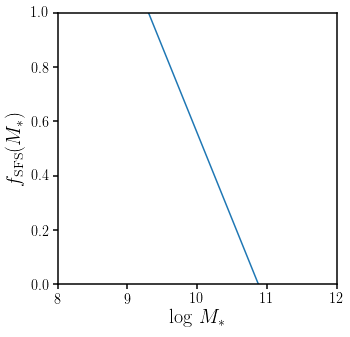

In [15]:
fig = plt.figure(figsize=(5,5))
sub = fig.add_subplot(111)
marr = np.linspace(8., 12., 20)
sub.plot(marr, Evo.Fsfms(marr))
sub.set_xlabel('$\log\,M_*$', fontsize=20)
sub.set_xlim([8., 12.])
sub.set_ylabel('$f_\mathrm{SFS}(M_*)$', fontsize=20)
sub.set_ylim([0., 1.])

In [17]:
initsfcat = Evo.initSF(shcat, {'sfms':{'name': 'flex', 'mslope':0.4, 'zslope': 1., 'sigma':0.3}})

In [18]:
mbin = np.linspace(8., 12., 20)
fsfs_sham = np.zeros(len(mbin)-1)
for i_m in range(len(mbin)-1): 
    inmbin = (initsfcat['m.sham'] > mbin[i_m]) & (initsfcat['m.sham'] < mbin[i_m+1])
    fsfs_sham[i_m] = float(np.sum(inmbin & (initsfcat['galtype'] == 'sf'))) / float(np.sum(inmbin))

(0.0, 1.0)

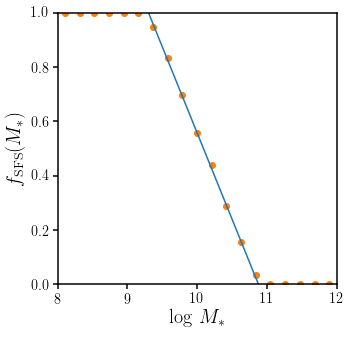

In [21]:
fig = plt.figure(figsize=(5,5))
sub = fig.add_subplot(111)
marr = np.linspace(8., 12., 20)
sub.plot(marr, Evo.Fsfms(marr))
sub.scatter(0.5*(mbin[:-1]+mbin[1:]), fsfs_sham, c='C1')
sub.set_xlabel('$\log\,M_*$', fontsize=20)
sub.set_xlim([8., 12.])
sub.set_ylabel('$f_\mathrm{SFS}(M_*)$', fontsize=20)
sub.set_ylim([0., 1.])

In [26]:
mbin = np.linspace(10.5, 15., 20)
fsfs_halo = np.zeros(len(mbin)-1)
for i_m in range(len(mbin)-1): 
    inmbin = (initsfcat['halo.m'] > mbin[i_m]) & (initsfcat['halo.m'] < mbin[i_m+1])
    fsfs_halo[i_m] = float(np.sum(inmbin & (initsfcat['galtype'] == 'sf'))) / float(np.sum(inmbin))

(0.0, 1.0)

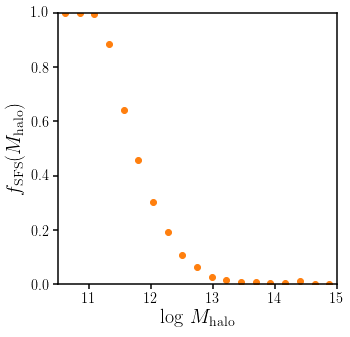

In [28]:
fig = plt.figure(figsize=(5,5))
sub = fig.add_subplot(111)
sub.scatter(0.5*(mbin[:-1]+mbin[1:]), fsfs_halo, c='C1')
sub.set_xlabel('$\log\,M_\mathrm{halo}$', fontsize=20)
sub.set_xlim([10.5, 15.])
sub.set_ylabel('$f_\mathrm{SFS}(M_\mathrm{halo})$', fontsize=20)
sub.set_ylim([0., 1.])